In [1]:
!python -m pip install pystan
!python -m pip install fbprophet

In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [4]:
df = pd.read_excel('./data/samsung.xlsx')
df

,date,volume,per,pbr,institution,corp,retail,foreign,atr,nasdaq,sp,cboe,exchangerate,futures2y,futures10y,y
0,2011-09-01,35870550,7.27,1.24,-83833734000,-8749641000,-177822918000,270406293000,880,"2,546.00","1,204.42",31.82,"1,064.40",110.28,130.61,15420
1,2011-09-02,12934100,7.26,1.23,-7185878000,2125969000,-11377060000,16436969000,360,"2,480.30","1,173.97",33.92,"1,065.60",110.25,131.30,15380
2,2011-09-05,13874400,6.90,1.17,-975699000,-215641000,29370756000,-28179416000,780,"2,480.30","1,173.97",33.92,"1,065.60",110.25,131.30,14620
3,2011-09-06,13225250,6.86,1.17,2349662000,-1299409000,13839817000,-14890070000,520,"2,473.80","1,165.24",37.00,"1,074.65",110.27,131.22,14540
4,2011-09-07,17575200,7.29,1.24,113232351000,1123519000,-77907268000,-36448602000,1020,"2,548.90","1,198.62",33.38,"1,069.65",110.27,130.89,15460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,2021-08-25,22319664,19.71,1.92,-76990474100,-8894667500,82373232300,3511909300,1700,"15,041.90","4,496.19",16.79,"1,163.87",110.25,133.63,75700
2457,2021-08-26,16671494,19.42,1.89,-55566537800,9344981600,142574757300,-96353201100,1600,"14,945.80","4,469.91",18.84,"1,170.53",110.25,133.59,74600
2458,2021-08-27,15172748,19.34,1.89,173118394100,10372274300,1510887500,-185001555900,1200,"15,129.50","4,509.37",16.39,"1,161.23",110.30,133.89,74300
2459,2021-08-30,12686999,19.42,1.89,24586418600,-2401179400,54715193800,-76900433000,1300,"15,265.90","4,528.79",16.19,"1,164.34",110.32,134.13,74600


In [5]:
df_copy = df[['date', 'y', 'date']].copy()

In [6]:
df_copy.columns = ['ds', 'y', 'date']

In [7]:
df_copy = df_copy.set_index('date')

In [8]:
df_copy

,ds,y
date,,
2011-09-01,2011-09-01,15420
2011-09-02,2011-09-02,15380
2011-09-05,2011-09-05,14620
2011-09-06,2011-09-06,14540
2011-09-07,2011-09-07,15460
...,...,...
2021-08-25,2021-08-25,75700
2021-08-26,2021-08-26,74600
2021-08-27,2021-08-27,74300


findfont: Font family ['sans_serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans_serif'] not found. Falling back to DejaVu Sans.


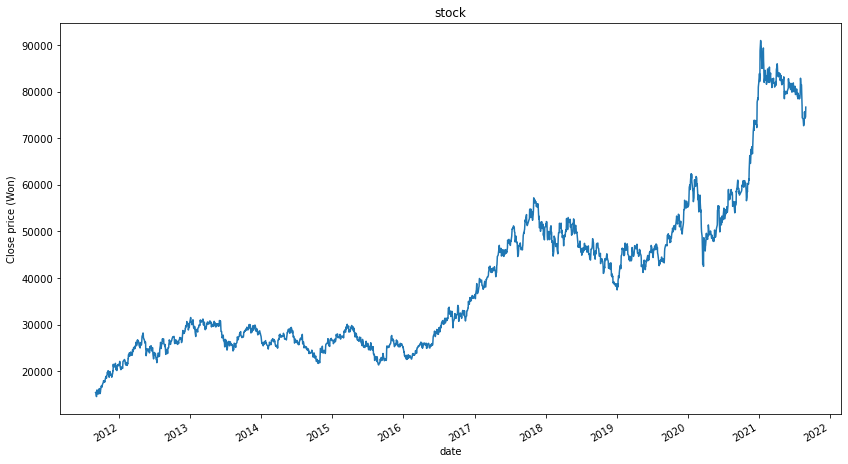

In [9]:
ax = df_copy['y'].plot(title='stock', figsize=(14,8))
ax.set_ylabel('Close price (Won)')
plt.show()

In [10]:
df_prophet = Prophet(changepoint_prior_scale=0.15, daily_seasonality=True)
df_prophet.fit(df_copy)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [11]:
fcast_time = 90   # 1 year: 365
df_forecast = df_prophet.make_future_dataframe(periods = fcast_time, freq = 'D')
df_forecast.tail(10)

,ds
2541,2021-11-20
2542,2021-11-21
2543,2021-11-22
2544,2021-11-23
2545,2021-11-24
2546,2021-11-25
2547,2021-11-26
2548,2021-11-27
2549,2021-11-28
2550,2021-11-29


In [12]:
df_forecast = df_prophet.predict(df_forecast)

In [13]:
df_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2546,2021-11-25,89470.440799,85025.554606,93746.451101
2547,2021-11-26,89494.593461,85465.985103,93667.468008
2548,2021-11-27,89388.777854,84853.906824,93158.206487
2549,2021-11-28,89473.306180,85478.456841,93406.304191
2550,2021-11-29,89717.954013,85771.061711,93833.215685


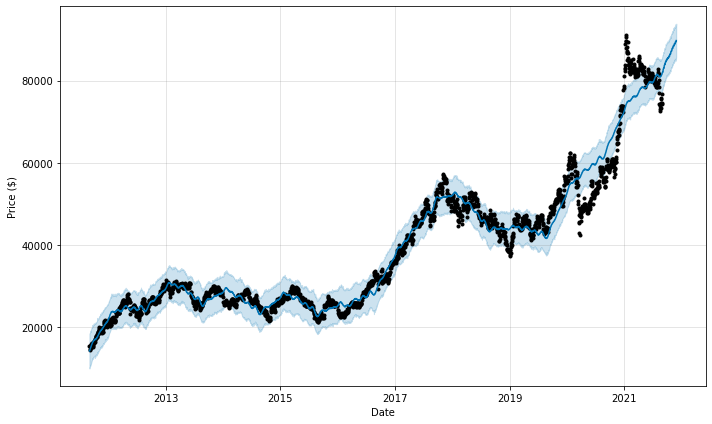

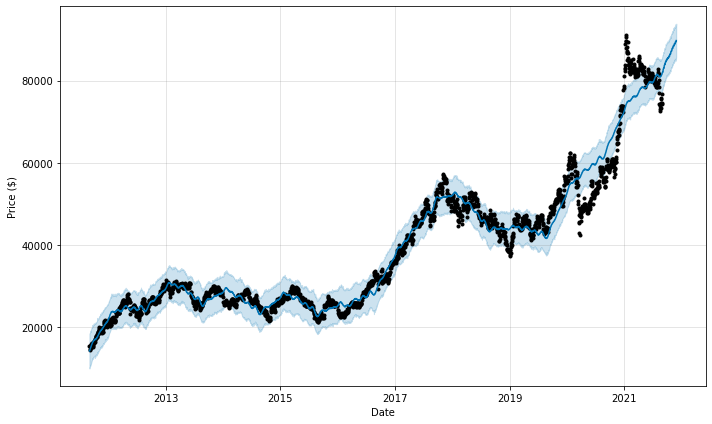

In [14]:
df_prophet.plot(df_forecast, xlabel = 'Date', ylabel = 'Price ($)')

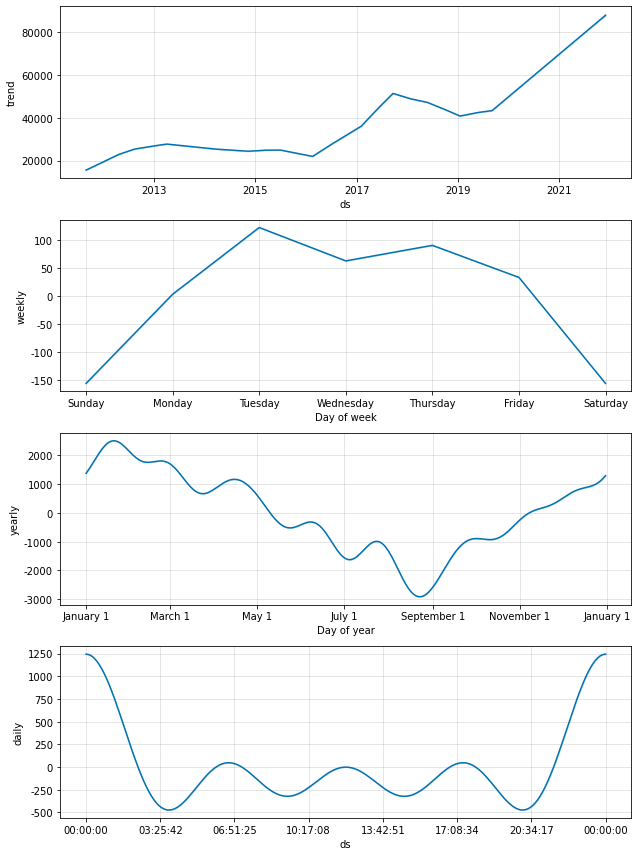

In [15]:
fig2 = df_prophet.plot_components(df_forecast)
plt.show()

In [16]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(df_prophet, initial='1095 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 13 forecasts with cutoffs between 2014-10-02 00:00:00 and 2020-08-31 00:00:00


  0%|          | 0/13 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-10-06,23479.571096,22657.271385,24358.279008,23020,2014-10-02
1,2014-10-07,23490.205520,22667.614359,24404.868061,23240,2014-10-02
2,2014-10-08,23426.975238,22604.883681,24273.544260,22600,2014-10-02
3,2014-10-10,23340.393545,22493.147496,24182.789724,22100,2014-10-02
4,2014-10-13,23226.215994,22313.406772,24022.865694,22160,2014-10-02


In [17]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,1.725519e+07,4153.936781,3220.433813,0.076786,0.069648,0.257862
1,39 days,1.748140e+07,4181.076554,3248.976627,0.077624,0.070553,0.251572
2,40 days,1.792173e+07,4233.406947,3302.567004,0.078974,0.071503,0.238994
3,41 days,1.869043e+07,4323.243242,3390.063272,0.081076,0.072513,0.225017
4,42 days,1.931641e+07,4395.043301,3453.900524,0.082639,0.073373,0.218029


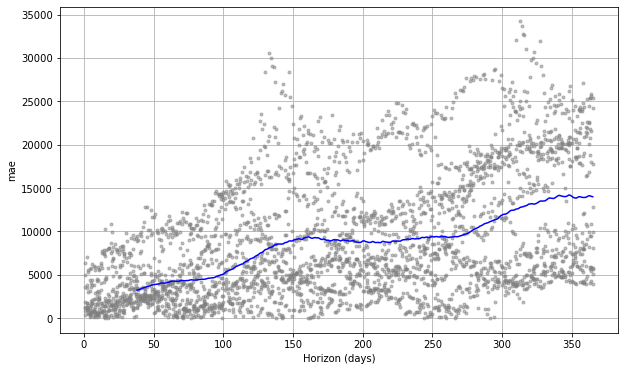

In [18]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric = 'mae')

In [24]:
pred_fbprophet_y = df_forecast.yhat.values[-20:]
test_y = df_copy.y.values[-20:]
pred_y_lower = df_forecast.yhat_lower.values[-20:]
pred_y_upper = df_forecast.yhat_upper.values[-20:]

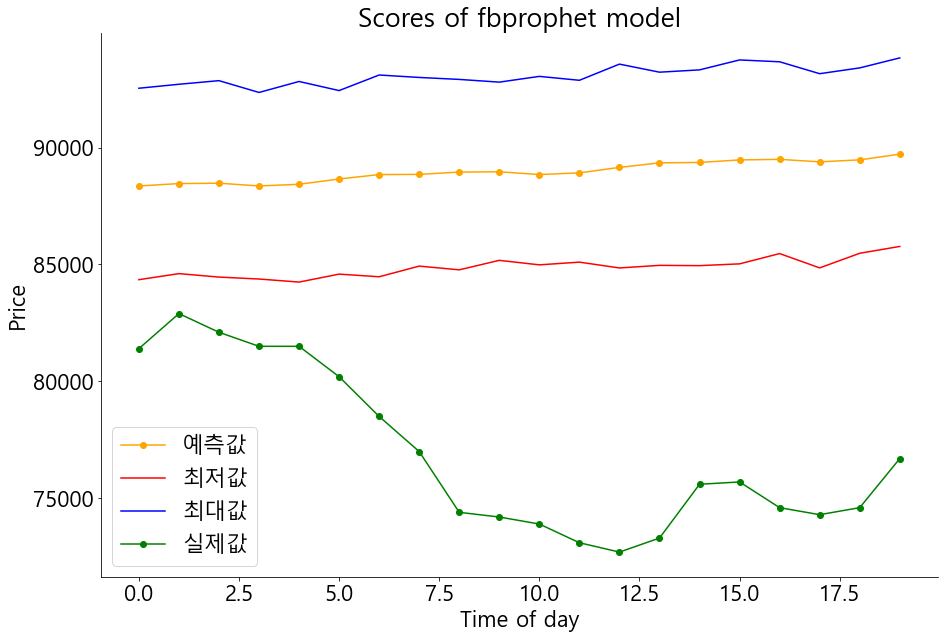

In [25]:
fig = plt.figure(figsize=(15, 10))
plt.rc('font', family='Malgun Gothic',size=22)

ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
ax.spines['right'].set_visible(False) ## 오른쪽 축 숨김
ax.spines['top'].set_visible(False) ## 위쪽 축 숨김


bbox = dict( ## 텍스트 박스 스타일 지정
    boxstyle='square', # 박스 모양
    facecolor='white', # 박스 배경색 
)

 # 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'orange', marker='o')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green', marker='o')

plt.xlabel('Time of day')
plt.ylabel('Price')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("Scores of fbprophet model")
plt.savefig('fbprophet.png')
plt.show()
